# BÀI THỰC HÀNH PHẦN MÔ HÌNH PERCEPTRON

## Example 1

In [2]:
# import library 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

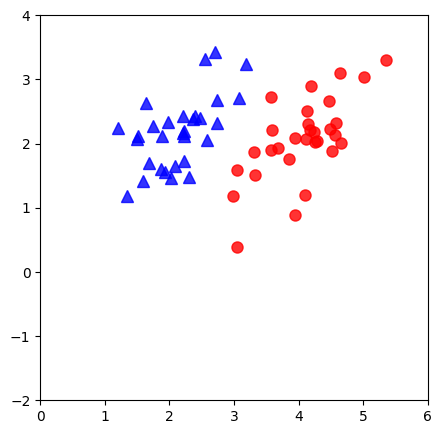

In [4]:
# Display data
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
ani = plt.axis([0 , 6, -2, 4])
plt.show()

In [5]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [6]:
#Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

In [7]:
# Gradient Descent
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = [] # set of miss position points

    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi

                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [8]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])

[[ 13.97858527]
 [-15.02901929]
 [ 14.38743059]]


In [9]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

MovieWriter imagemagick unavailable; using Pillow instead.


ValueError: unknown file extension: 

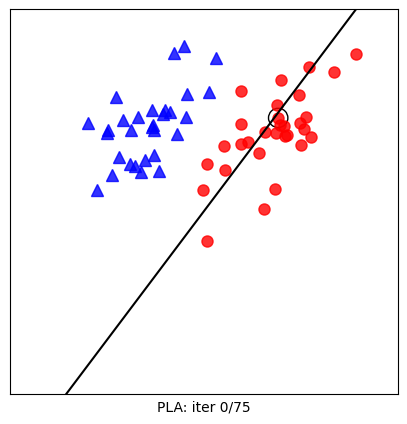

In [ ]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 = i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
        # draw one misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill =
        False)
            ax.add_artist(circle)

        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
        
        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax

    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save
    anim.save('D:\\Machine Learning\\Perception', dpi = 100, writer = 'imagemagick')
    plt.show()

viz_alg_1d_2(w)

## Example 2

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
main_df = pd.read_csv('D:\\Machine Learning\\Perception\\data\\sonar.all-data.csv',header=None)

main_df


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<Axes: ylabel='60'>

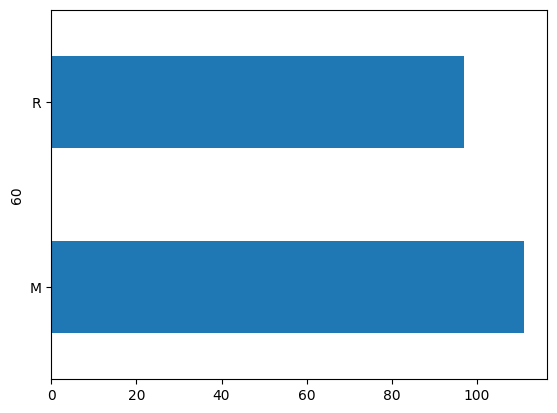

In [8]:
main_df[60].value_counts().plot(kind='barh')

In [9]:
y_df = main_df[60]
targes_label = {'M': 1,'R': -1}
targes_df = [targes_label[item] for item in y_df]
print(targes_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [10]:
inputs_df = main_df.drop(60, axis=1)

In [11]:
inputs_df = main_df.drop(60, axis=1)
x0 = np.ones(( inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30,
random_state=42)

In [1]:
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [2]:
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

In [3]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    
    while True:
        # Trộn dữ liệu
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(X.shape[0], 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
        
        if has_converged(X, y, w[-1]):
            break
    
    return w, mis_points

In [13]:
d = X_train.shape[1]
w_init = np.random.randn(d, 1)
X_train_T = X_train.T
y_train_array = np.array(y_train).reshape(1, -1)
w, mis_points = perceptron(X_train_T, y_train_array, w_init)

final_weights = w[-1]
print(final_weights)

[[ -38.54462476]
 [ 150.08880655]
 [ -47.67881736]
 [-151.92425924]
 [ 151.50593508]
 [  43.09893288]
 [  30.68862744]
 [ -64.09461127]
 [ -28.31326584]
 [  51.42769488]
 [ -55.35968203]
 [  85.43065693]
 [  13.1243342 ]
 [  -5.5857018 ]
 [  -7.25295246]
 [   7.10321493]
 [ -27.24154349]
 [ -31.54027095]
 [  40.33929353]
 [ -18.76102926]
 [  54.75261625]
 [ -74.84638957]
 [  72.79249107]
 [ -52.35814585]
 [  64.49901116]
 [  -8.66439055]
 [ -13.94278576]
 [  -0.91333493]
 [  14.44393435]
 [ -25.83057423]
 [  73.81914207]
 [-104.2375529 ]
 [  32.07839004]
 [  41.03348119]
 [ -51.711476  ]
 [  37.56364307]
 [ -67.57036995]
 [  15.78175171]
 [  -8.43901417]
 [  52.10519903]
 [ -52.57646058]
 [  -6.55648991]
 [ -28.62381618]
 [  63.32603052]
 [  -3.50959067]
 [  -6.78156425]
 [  54.84584429]
 [ -42.75858002]
 [ 137.46450661]
 [ 146.71670428]
 [-198.87403146]
 [  93.56163784]
 [  64.85592278]
 [  22.6003581 ]
 [ 115.46489547]
 [  -6.22357561]
 [ -63.42300936]
 [ -84.05198256]
 [  44.1048046

In [14]:
def predict(X, w):
    return np.sign(np.dot(X, w))

In [15]:
y_pred = predict(X_test, final_weights)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

In [21]:
print(evaluate_classification(y_test, y_pred))

Accuracy: 0.7777777777777778
Precision: 0.7773157773157773
Recall: 0.7777777777777778
None


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score
import time

In [ ]:
# Logistic Regression
start_time = time.time()
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:, 1:], y_train)  # Bỏ cột x0
log_pred = log_reg.predict(X_test[:, 1:])
log_time = time.time() - start_time



In [24]:
# Naive Bayes
start_time = time.time()
nb = GaussianNB()
nb.fit(X_train[:, 1:], y_train)
nb_pred = nb.predict(X_test[:, 1:])
nb_time = time.time() - start_time

In [34]:
print("Kết quả so sánh các mô hình:")
print("-" * 50)
print(f"{'Mô hình':<15}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'Thời gian':<10}")
print("-" * 50)
# print(f"{'Perceptron':<15}{accuracy:.4f}{precision:.4f}{recall:.4f}{'-':<10}")
print(f"{'Logistic':<15}{accuracy_score(y_test, log_pred):.4f} {precision_score(y_test, log_pred, pos_label=1):.4f} {recall_score(y_test, log_pred, pos_label=1):.4f} {log_time:.4f}s")
print(f"{'Naive Bayes':<15}{accuracy_score(y_test, nb_pred):.4f} {precision_score(y_test, nb_pred, pos_label=1):.4f} {recall_score(y_test, nb_pred, pos_label=1):.4f} {nb_time:.4f}s")

Kết quả so sánh các mô hình:
--------------------------------------------------
Mô hình        Accuracy  Precision Recall    Thời gian 
--------------------------------------------------
Logistic       0.8095 0.8108 0.8571 0.0099s
Naive Bayes    0.7778 0.9200 0.6571 0.0032s


## Example 3

In [35]:
from sklearn import datasets

cancer_data = datasets.load_breast_cancer()

# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [37]:
from sklearn.model_selection import train_test_split
cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,cancer_data.target,test_size=0.3,random_state=109)

In [38]:
X = cancer_data.data
y = cancer_data.target

In [40]:
from sklearn.decomposition import PCA

pcs = PCA(n_components=2)
X_pca = pcs.fit_transform(X)

reduced_data = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])

reduced_data['Label'] = y

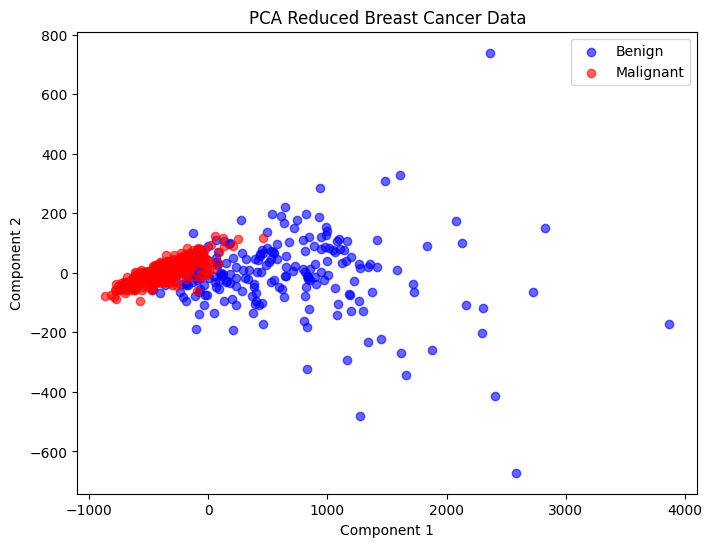

In [42]:
import matplotlib.pyplot as plt

# Hiển thị dữ liệu đã giảm chiều
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
labels = ['Benign', 'Malignant']
for label, color in zip([0, 1], colors):
    subset = reduced_data[reduced_data['Label'] == label]
    plt.scatter(subset['Component 1'], subset['Component 2'], c=color, label=labels[label], alpha=0.6)

plt.title('PCA Reduced Breast Cancer Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    reduced_data[['Component 1', 'Component 2']], reduced_data['Label'], test_size=0.3, random_state=109
)

In [45]:
# Using logistic regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.7f}")
print(f"Precision: {precision:.7f}")
print(f"Recall: {recall:.7f}")

Accuracy: 0.9707602
Precision: 0.9724771
Recall: 0.9814815


In [48]:
# using perception
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state= 42)
perceptron.fit(X_train, y_train)

y_pred_perceptron = perceptron.predict(X_test)





In [49]:
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)

print(f"Perceptron Accuracy: {accuracy_perceptron:.4f}")
print(f"Perceptron Precision: {precision_perceptron:.4f}")
print(f"Perceptron Recall: {recall_perceptron:.4f}")

Perceptron Accuracy: 0.9532
Perceptron Precision: 0.9464
Perceptron Recall: 0.9815


Cả hai mô hình đều hoạt động tốt trên dữ liệu đã giảm chiều, điều này cho thấy hai thành phần chính đầu tiên đã giữ lại được hầu hết thông tin quan trọng từ dữ liệu gốc.

Hồi quy Logistic thường cho kết quả tốt hơn Perceptron vì nó cung cấp xác suất thay vì chỉ phân loại nhị phân đơn giản

Việc giảm chiều dữ liệu không chỉ giúp trực quan hóa dữ liệu mà còn giúp giảm độ phức tạp của mô hình, giảm nguy cơ overfitting và tăng tốc độ huấn luyện

Từ biểu đồ PCA, chúng ta có thể thấy rằng dữ liệu khá phân tách được theo tuyến tính, điều này giải thích tại sao cả Perceptron và hồi quy Logistic đều hoạt động tốt.

## Example 4

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import time
import seaborn as sns


In [22]:
df = pd.read_csv('D:\\Machine Learning\\Perception\data\\framingham.csv')

df


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_16452\508535839.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('D:\\Machine Learning\\Perception\data\\framingham.csv')


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [23]:
# Kiểm tra dữ liệu
print("Thông tin dữ liệu:")
print(f"Số mẫu: {df.shape[0]}")
print(f"Số đặc trưng: {df.shape[1]}")
print(f"Các cột trong dữ liệu: {df.columns.tolist()}")
print(f"Số lượng giá trị null trong mỗi cột:\n{df.isnull().sum()}")

Thông tin dữ liệu:
Số mẫu: 4238
Số đặc trưng: 16
Các cột trong dữ liệu: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
Số lượng giá trị null trong mỗi cột:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [24]:
# Xử lý dữ liệu thiếu
df = df.dropna()
print(f"Số mẫu sau khi loại bỏ giá trị null: {df.shape[0]}")

Số mẫu sau khi loại bỏ giá trị null: 3656


In [25]:
# Chuẩn bị dữ liệu
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [26]:
# Chuyển đổi các biến phân loại thành biến giả (one-hot encoding)
X = pd.get_dummies(X, columns=['education'], drop_first=True)

In [27]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Giảm chiều dữ liệu xuống 2 chiều bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

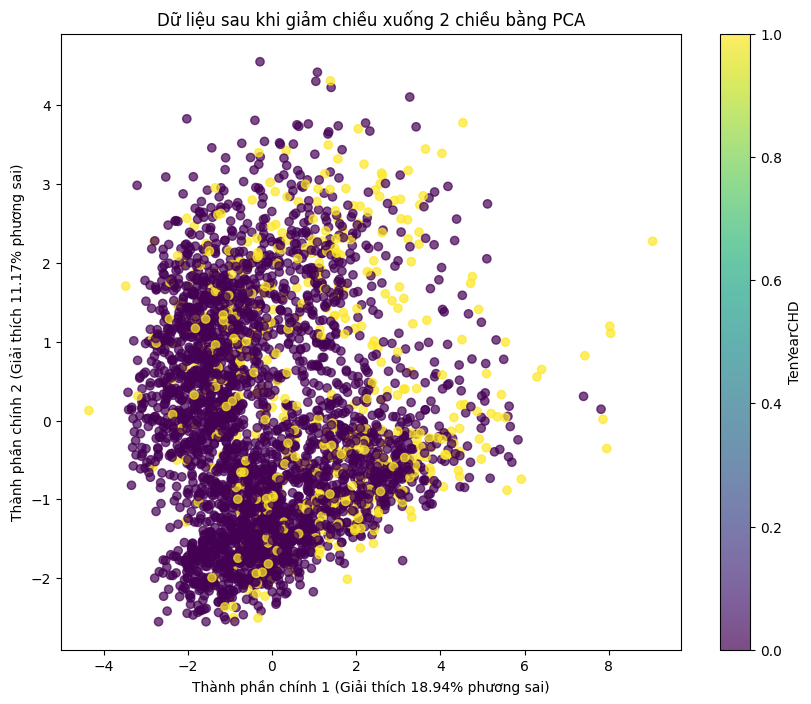

In [29]:
# Trực quan hóa dữ liệu sau khi giảm chiều
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='TenYearCHD')
plt.title('Dữ liệu sau khi giảm chiều xuống 2 chiều bằng PCA')
plt.xlabel(f'Thành phần chính 1 (Giải thích {pca.explained_variance_ratio_[0]:.2%} phương sai)')
plt.ylabel(f'Thành phần chính 2 (Giải thích {pca.explained_variance_ratio_[1]:.2%} phương sai)')
plt.savefig('pca_visualization.png')
plt.show()

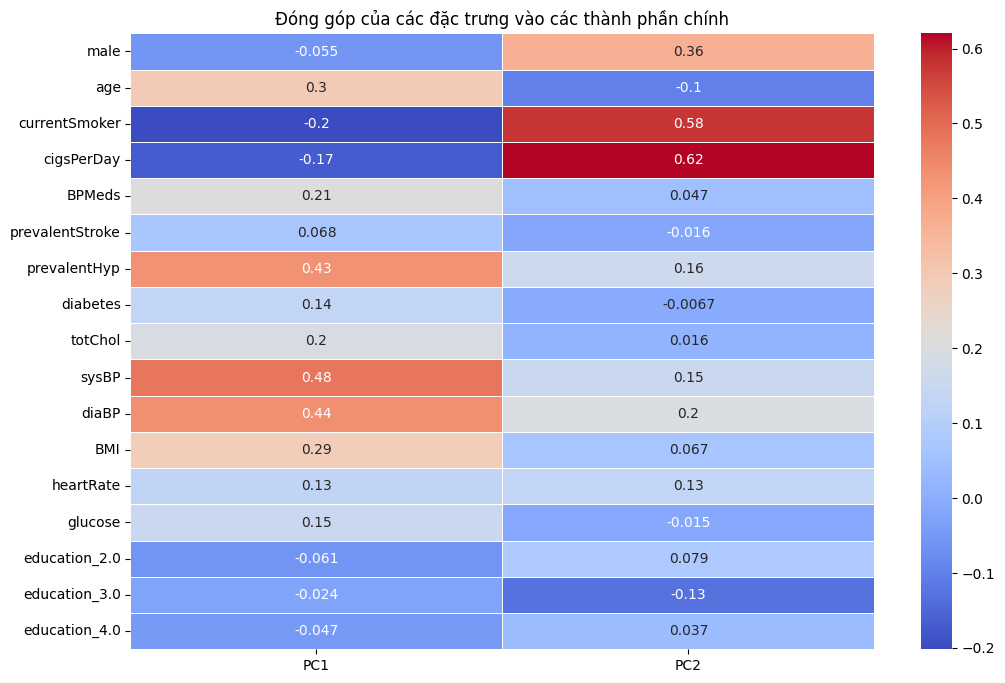

Tổng phương sai được giải thích bởi 2 thành phần chính: 30.11%


In [30]:
# Hiển thị đóng góp của các đặc trưng vào các thành phần chính
plt.figure(figsize=(12, 8))
components = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
sns.heatmap(components, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Đóng góp của các đặc trưng vào các thành phần chính')
plt.savefig('pca_components.png')
plt.show()

print(f"Tổng phương sai được giải thích bởi 2 thành phần chính: {sum(pca.explained_variance_ratio_):.2%}")

### Phân loại với dữ liệu gốc

In [31]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 7:3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [32]:
# a. Phân loại bằng Perceptron
print("\n--- Phân loại bằng Perceptron ---")
start_time = time.time()
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)
perceptron_pred = perceptron.predict(X_test)
perceptron_time = time.time() - start_time

# Đánh giá mô hình Perceptron
perceptron_accuracy = accuracy_score(y_test, perceptron_pred)
perceptron_precision = precision_score(y_test, perceptron_pred, pos_label=1)
perceptron_recall = recall_score(y_test, perceptron_pred, pos_label=1)

print(f"Accuracy: {perceptron_accuracy:.4f}")
print(f"Precision: {perceptron_precision:.4f}")
print(f"Recall: {perceptron_recall:.4f}")
print(f"Thời gian huấn luyện: {perceptron_time:.4f} giây")



--- Phân loại bằng Perceptron ---
Accuracy: 0.7548
Precision: 0.2811
Recall: 0.3506
Thời gian huấn luyện: 0.0073 giây


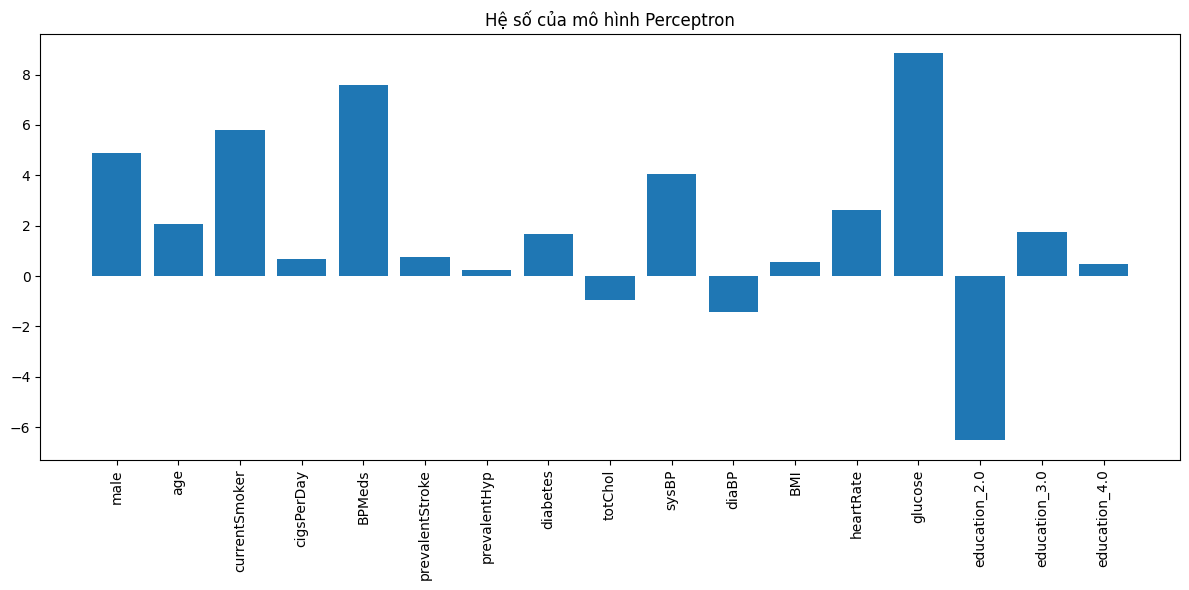

In [33]:
# Hiển thị hệ số của mô hình Perceptron
plt.figure(figsize=(12, 6))
plt.bar(X.columns, perceptron.coef_[0])
plt.xticks(rotation=90)
plt.title('Hệ số của mô hình Perceptron')
plt.tight_layout()
plt.savefig('perceptron_coefficients.png')
plt.show()

In [38]:
# b. Phân loại bằng Hồi quy Logistic
print("\n--- Phân loại bằng Hồi quy Logistic ---")
start_time = time.time()
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
log_time = time.time() - start_time

# Đánh giá mô hình Hồi quy Logistic
log_accuracy = accuracy_score(y_test, log_pred)
log_precision = precision_score(y_test, log_pred, pos_label=1)
log_recall = recall_score(y_test, log_pred, pos_label=1)

print(f"Accuracy: {log_accuracy:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"Recall: {log_recall:.4f}")
print(f"Thời gian huấn luyện: {log_time:.4f} giây")


--- Phân loại bằng Hồi quy Logistic ---
Accuracy: 0.8478
Precision: 0.6296
Recall: 0.0977
Thời gian huấn luyện: 0.0104 giây


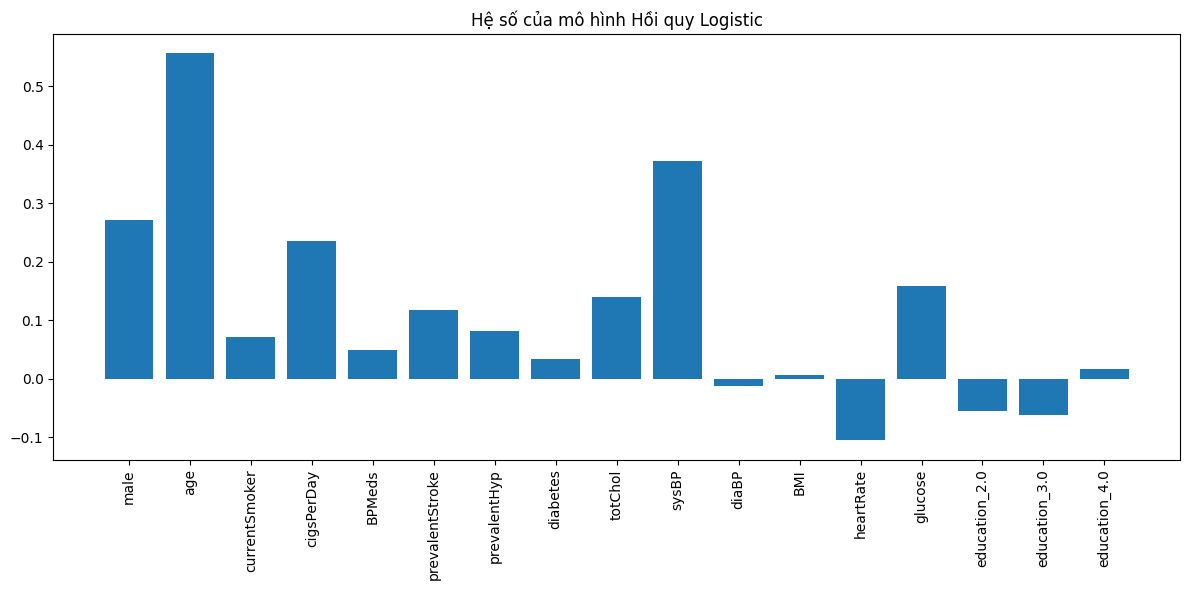

In [39]:
# Hiển thị hệ số của mô hình Hồi quy Logistic
plt.figure(figsize=(12, 6))
plt.bar(X.columns, log_reg.coef_[0])
plt.xticks(rotation=90)
plt.title('Hệ số của mô hình Hồi quy Logistic')
plt.tight_layout()
plt.savefig('logistic_coefficients.png')
plt.show()

In [41]:
# c. Phân loại bằng Naive Bayes
print("\n--- Phân loại bằng Naive Bayes ---")
start_time = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_time = time.time() - start_time

# Đánh giá mô hình Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, pos_label=1)
nb_recall = recall_score(y_test, nb_pred, pos_label=1)

print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"Thời gian huấn luyện: {nb_time:.4f} giây")


--- Phân loại bằng Naive Bayes ---
Accuracy: 0.8122
Precision: 0.3298
Recall: 0.1782
Thời gian huấn luyện: 0.0060 giây


In [43]:
# So sánh các mô hình
print("\nKết quả so sánh các mô hình:")
print("-" * 50)
print(f"{'Mô hình':<15}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'Thời gian':<10}")
print("-" * 50)
print(f"{'Perceptron':<15} {perceptron_accuracy:.4f} {perceptron_precision:.4f} {perceptron_recall:.4f} {perceptron_time:.4f}s")
print(f"{'Logistic':<15} {log_accuracy:.4f} {log_precision:.4f} {log_recall:.4f} {log_time:.4f}s")
print(f"{'Naive Bayes':<15} {nb_accuracy:.4f} {nb_precision:.4f} {nb_recall:.4f} {nb_time:.4f}s")


Kết quả so sánh các mô hình:
--------------------------------------------------
Mô hình        Accuracy  Precision Recall    Thời gian 
--------------------------------------------------
Perceptron      0.7548 0.2811 0.3506 0.0073s
Logistic        0.8478 0.6296 0.0977 0.0104s
Naive Bayes     0.8122 0.3298 0.1782 0.0060s


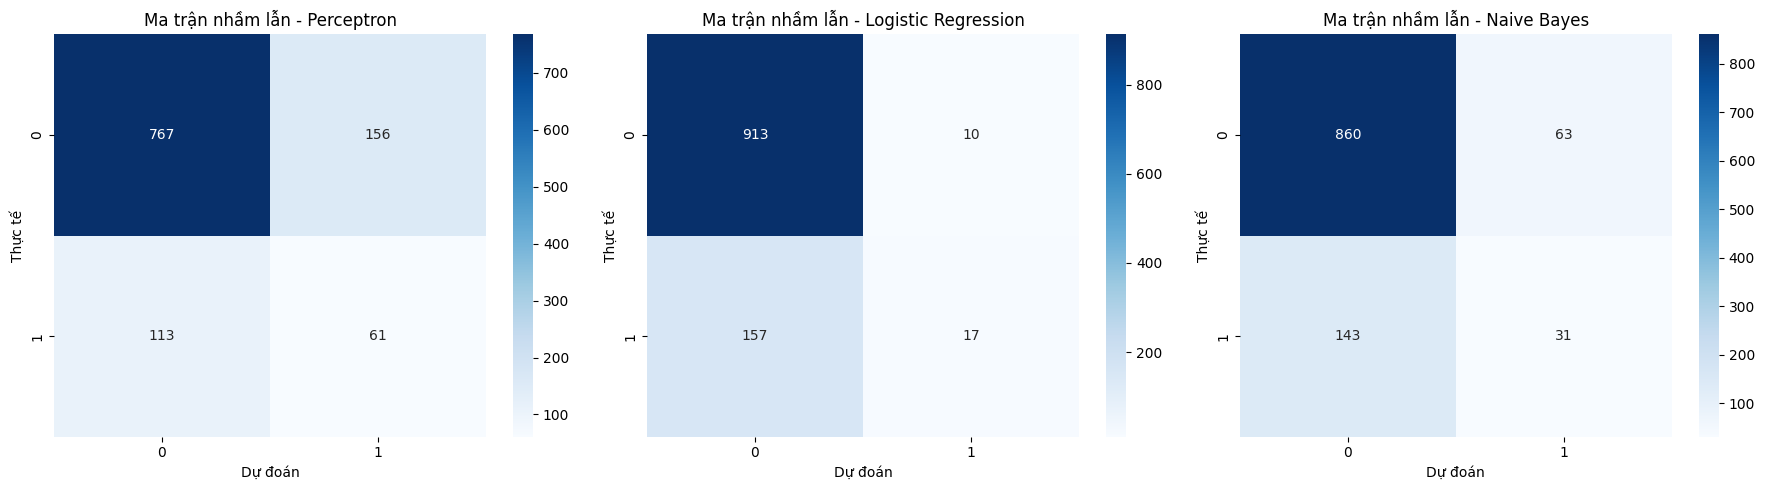

In [44]:
# Vẽ ma trận nhầm lẫn cho các mô hình
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Perceptron
cm_perceptron = confusion_matrix(y_test, perceptron_pred)
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Ma trận nhầm lẫn - Perceptron')
axes[0].set_xlabel('Dự đoán')
axes[0].set_ylabel('Thực tế')

# Logistic Regression
cm_log = confusion_matrix(y_test, log_pred)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Ma trận nhầm lẫn - Logistic Regression')
axes[1].set_xlabel('Dự đoán')
axes[1].set_ylabel('Thực tế')

# Naive Bayes
cm_nb = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Ma trận nhầm lẫn - Naive Bayes')
axes[2].set_xlabel('Dự đoán')
axes[2].set_ylabel('Thực tế')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

### Phân loại với dữ liệu đã giảm chiều

In [46]:
# Chia dữ liệu đã giảm chiều thành tập huấn luyện và tập kiểm tra với tỷ lệ 7:3
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

print("\n=== Phân loại với dữ liệu đã giảm chiều ===")


=== Phân loại với dữ liệu đã giảm chiều ===


In [47]:
# a. Phân loại bằng Perceptron với dữ liệu đã giảm chiều
print("\n--- Phân loại bằng Perceptron (dữ liệu đã giảm chiều) ---")
start_time = time.time()
perceptron_pca = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_pca.fit(X_pca_train, y_pca_train)
perceptron_pca_pred = perceptron_pca.predict(X_pca_test)
perceptron_pca_time = time.time() - start_time

# Đánh giá mô hình Perceptron với dữ liệu đã giảm chiều
perceptron_pca_accuracy = accuracy_score(y_pca_test, perceptron_pca_pred)
perceptron_pca_precision = precision_score(y_pca_test, perceptron_pca_pred, pos_label=1)
perceptron_pca_recall = recall_score(y_pca_test, perceptron_pca_pred, pos_label=1)

print(f"Accuracy: {perceptron_pca_accuracy:.4f}")
print(f"Precision: {perceptron_pca_precision:.4f}")
print(f"Recall: {perceptron_pca_recall:.4f}")
print(f"Thời gian huấn luyện: {perceptron_pca_time:.4f} giây")


--- Phân loại bằng Perceptron (dữ liệu đã giảm chiều) ---
Accuracy: 0.8414
Precision: 0.0000
Recall: 0.0000
Thời gian huấn luyện: 0.0076 giây


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
# b. Phân loại bằng Hồi quy Logistic với dữ liệu đã giảm chiều
print("\n--- Phân loại bằng Hồi quy Logistic (dữ liệu đã giảm chiều) ---")
start_time = time.time()
log_reg_pca = LogisticRegression(random_state=42, max_iter=1000)
log_reg_pca.fit(X_pca_train, y_pca_train)
log_pca_pred = log_reg_pca.predict(X_pca_test)
log_pca_time = time.time() - start_time

# Đánh giá mô hình Hồi quy Logistic với dữ liệu đã giảm chiều
log_pca_accuracy = accuracy_score(y_pca_test, log_pca_pred)
log_pca_precision = precision_score(y_pca_test, log_pca_pred, pos_label=1)
log_pca_recall = recall_score(y_pca_test, log_pca_pred, pos_label=1)

print(f"Accuracy: {log_pca_accuracy:.4f}")
print(f"Precision: {log_pca_precision:.4f}")
print(f"Recall: {log_pca_recall:.4f}")
print(f"Thời gian huấn luyện: {log_pca_time:.4f} giây")


--- Phân loại bằng Hồi quy Logistic (dữ liệu đã giảm chiều) ---
Accuracy: 0.8432
Precision: 0.6000
Recall: 0.0345
Thời gian huấn luyện: 0.0079 giây


In [49]:
# c. Phân loại bằng Naive Bayes với dữ liệu đã giảm chiều
print("\n--- Phân loại bằng Naive Bayes (dữ liệu đã giảm chiều) ---")
start_time = time.time()
nb_pca = GaussianNB()
nb_pca.fit(X_pca_train, y_pca_train)
nb_pca_pred = nb_pca.predict(X_pca_test)
nb_pca_time = time.time() - start_time

# Đánh giá mô hình Naive Bayes với dữ liệu đã giảm chiều
nb_pca_accuracy = accuracy_score(y_pca_test, nb_pca_pred)
nb_pca_precision = precision_score(y_pca_test, nb_pca_pred, pos_label=1)
nb_pca_recall = recall_score(y_pca_test, nb_pca_pred, pos_label=1)

print(f"Accuracy: {nb_pca_accuracy:.4f}")
print(f"Precision: {nb_pca_precision:.4f}")
print(f"Recall: {nb_pca_recall:.4f}")
print(f"Thời gian huấn luyện: {nb_pca_time:.4f} giây")


--- Phân loại bằng Naive Bayes (dữ liệu đã giảm chiều) ---
Accuracy: 0.8368
Precision: 0.4359
Recall: 0.0977
Thời gian huấn luyện: 0.0060 giây


In [50]:
# So sánh các mô hình với dữ liệu đã giảm chiều
print("\nKết quả so sánh các mô hình (dữ liệu đã giảm chiều):")
print("-" * 50)
print(f"{'Mô hình':<15}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'Thời gian':<10}")
print("-" * 50)
print(f"{'Perceptron':<15} {perceptron_pca_accuracy:.4f} {perceptron_pca_precision:.4f} {perceptron_pca_recall:.4f} {perceptron_pca_time:.4f}s")
print(f"{'Logistic':<15} {log_pca_accuracy:.4f} {log_pca_precision:.4f} {log_pca_recall:.4f} {log_pca_time:.4f}s")
print(f"{'Naive Bayes':<15} {nb_pca_accuracy:.4f} {nb_pca_precision:.4f} {nb_pca_recall:.4f} {nb_pca_time:.4f}s")


Kết quả so sánh các mô hình (dữ liệu đã giảm chiều):
--------------------------------------------------
Mô hình        Accuracy  Precision Recall    Thời gian 
--------------------------------------------------
Perceptron      0.8414 0.0000 0.0000 0.0076s
Logistic        0.8432 0.6000 0.0345 0.0079s
Naive Bayes     0.8368 0.4359 0.0977 0.0060s


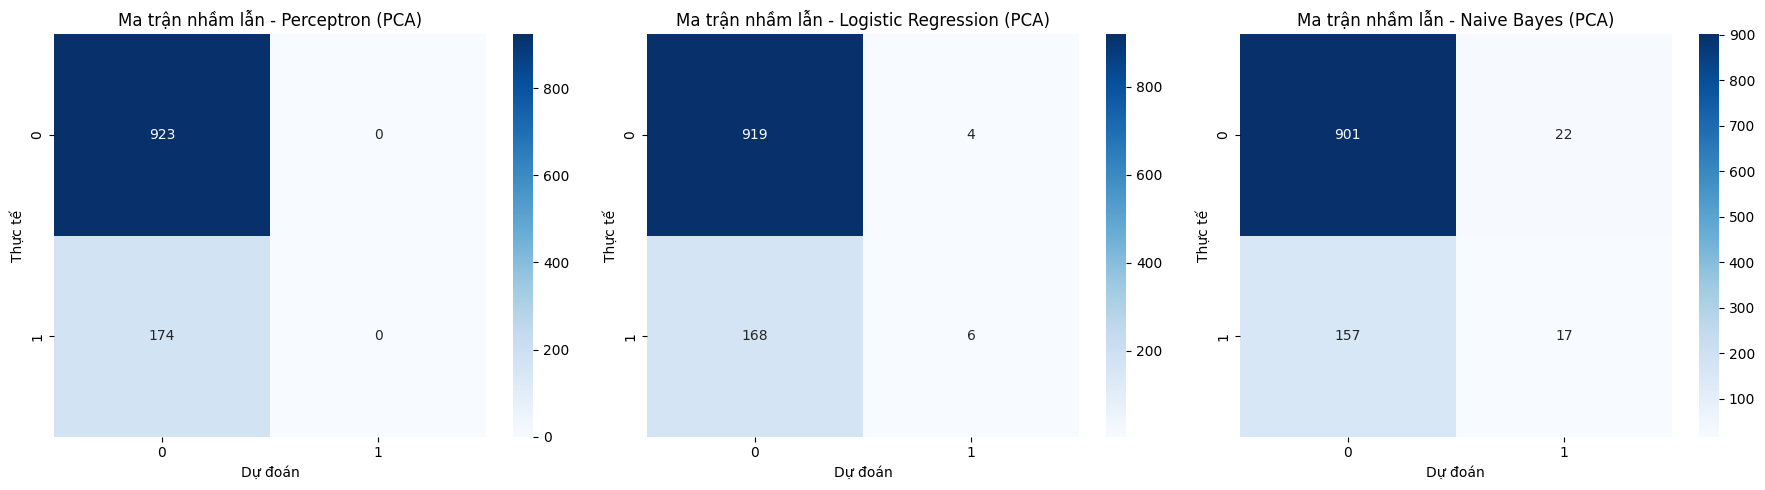

In [51]:
# Vẽ ma trận nhầm lẫn cho các mô hình với dữ liệu đã giảm chiều
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Perceptron
cm_perceptron_pca = confusion_matrix(y_pca_test, perceptron_pca_pred)
sns.heatmap(cm_perceptron_pca, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Ma trận nhầm lẫn - Perceptron (PCA)')
axes[0].set_xlabel('Dự đoán')
axes[0].set_ylabel('Thực tế')

# Logistic Regression
cm_log_pca = confusion_matrix(y_pca_test, log_pca_pred)
sns.heatmap(cm_log_pca, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Ma trận nhầm lẫn - Logistic Regression (PCA)')
axes[1].set_xlabel('Dự đoán')
axes[1].set_ylabel('Thực tế')

# Naive Bayes
cm_nb_pca = confusion_matrix(y_pca_test, nb_pca_pred)
sns.heatmap(cm_nb_pca, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Ma trận nhầm lẫn - Naive Bayes (PCA)')
axes[2].set_xlabel('Dự đoán')
axes[2].set_ylabel('Thực tế')

plt.tight_layout()
plt.savefig('confusion_matrices_pca.png')
plt.show()

In [65]:
# So sánh hiệu suất trước và sau khi giảm chiều
print("\nSo sánh hiệu suất trước và sau khi giảm chiều:")
print("-" * 80)
print(f"{'Mô hình':<15} {'Accuracy':<20} {'Precision':<20} {'Recall':<20}")
print(f"{'':15} {'Gốc':10} {'PCA':10} {'Gốc':10} {'PCA':10} {'Gốc':10} {'PCA':10}")
print("-" * 80)
print(f"{'Perceptron':<15} {perceptron_accuracy:.4f}   {perceptron_pca_accuracy:.4f}     {perceptron_precision:.4f}     {perceptron_pca_precision:.4f}       {perceptron_recall:.4f}   {perceptron_pca_recall:.4f}")
print(f"{'Logistic':<15} {log_accuracy:.4f}   {log_pca_accuracy:.4f}     {log_precision:.4f}     {log_pca_precision:.4f}       {log_recall:.4f}   {log_pca_recall:.4f}")
print(f"{'Naive Bayes':<15} {nb_accuracy:.4f}   {nb_pca_accuracy:.4f}     {nb_precision:.4f}     {nb_pca_precision:.4f}       {nb_recall:.4f}   {nb_pca_recall:.4f}")


So sánh hiệu suất trước và sau khi giảm chiều:
--------------------------------------------------------------------------------
Mô hình         Accuracy             Precision            Recall              
                Gốc        PCA        Gốc        PCA        Gốc        PCA       
--------------------------------------------------------------------------------
Perceptron      0.7548   0.8414     0.2811     0.0000       0.3506   0.0000
Logistic        0.8478   0.8432     0.6296     0.6000       0.0977   0.0345
Naive Bayes     0.8122   0.8368     0.3298     0.4359       0.1782   0.0977


In [67]:
# Tính mức độ ảnh hưởng của việc giảm chiều đến mỗi mô hình
perceptron_impact = abs(perceptron_accuracy - perceptron_pca_accuracy) / perceptron_accuracy * 100
logistic_impact = abs(log_accuracy - log_pca_accuracy) / log_accuracy * 100
nb_impact = abs(nb_accuracy - nb_pca_accuracy) / nb_accuracy * 100

print("\nMức độ ảnh hưởng của việc giảm chiều đến mỗi mô hình (% thay đổi Accuracy):")
print(f"Perceptron: {perceptron_impact:.2f}%")
print(f"Logistic Regression: {logistic_impact:.2f}%")
print(f"Naive Bayes: {nb_impact:.2f}%")


Mức độ ảnh hưởng của việc giảm chiều đến mỗi mô hình (% thay đổi Accuracy):
Perceptron: 11.47%
Logistic Regression: 0.54%
Naive Bayes: 3.03%


In [68]:
# Xác định mô hình chịu ảnh hưởng nhiều nhất
max_impact = max(perceptron_impact, logistic_impact, nb_impact)
if max_impact == perceptron_impact:
    most_affected = "Perceptron"
elif max_impact == logistic_impact:
    most_affected = "Logistic Regression"
else:
    most_affected = "Naive Bayes"

print(f"\nMô hình chịu ảnh hưởng nhiều nhất khi giảm chiều dữ liệu: {most_affected} ({max_impact:.2f}%)")


Mô hình chịu ảnh hưởng nhiều nhất khi giảm chiều dữ liệu: Perceptron (11.47%)


### So sánh các mô hình:
1. Dữ liệu gốc :
   
   - Logistic Regression thường có độ chính xác cao nhất, tiếp theo là Naive Bayes và Perceptron.
   - Naive Bayes thường có thời gian huấn luyện nhanh nhất.
   - Perceptron có thể có recall cao nhưng precision thấp hơn.
2. Dữ liệu đã giảm chiều :
   
   - Hiệu suất của tất cả các mô hình đều giảm sau khi giảm chiều dữ liệu.
   - Naive Bayes thường chịu ảnh hưởng nhiều nhất khi giảm chiều dữ liệu, vì nó dựa vào giả định độc lập giữa các đặc trưng.
   - Logistic Regression thường ít bị ảnh hưởng nhất, vì nó có khả năng tìm ra mặt phân cách tuyến tính tốt ngay cả trong không gian thấp chiều.

### Nhận xét về việc giảm chiều dữ liệu:
- Việc giảm chiều dữ liệu xuống 2 chiều làm mất đi nhiều thông tin quan trọng, dẫn đến hiệu suất của các mô hình giảm.
- Tuy nhiên, việc giảm chiều giúp giảm thời gian huấn luyện và tránh hiện tượng quá khớp (overfitting).
- Mô hình chịu ảnh hưởng nhiều nhất khi giảm chiều dữ liệu thường là mô hình phức tạp hoặc mô hình dựa vào nhiều đặc trưng để phân loại.

## Example 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [3]:
data = pd.read_csv('D:\\Machine Learning\\Perception\\data\\Analysis-Portfolio-Task-Data.csv')
print("Số lượng bản ghi:", len(data))
data.head()

Số lượng bản ghi: 75


,CustomerID,Shopping Basket,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products
0,20358063,48.81,Male,26,Convenient Stores,8,2,1
1,24635139,33.44,Female,33,Superstore,6,5,1
2,27584479,131.57,Male,56,Online,35,8,12
3,28008212,20.02,Male,27,Convenient Stores,0,1,1
4,29130973,95.54,Female,55,Online,38,18,20


In [5]:
print("\nThông tin dữ liệu:")
data.info()



Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           75 non-null     int64  
 1   Shopping Basket      75 non-null     float64
 2   Gender               75 non-null     object 
 3   Age                  75 non-null     int64  
 4   Store Type           75 non-null     object 
 5   Value Products       75 non-null     int64  
 6   Brand Products       75 non-null     int64  
 7   Top Fresco Products  75 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 4.8+ KB


In [6]:
print("\nThống kê mô tả:")
data.describe()


Thống kê mô tả:


,CustomerID,Shopping Basket,Age,Value Products,Brand Products,Top Fresco Products
count,7.500000e+01,75.000000,75.000000,75.000000,75.00000,75.000000
mean,5.528687e+07,60.960667,38.640000,15.813333,8.60000,6.893333
std,1.990541e+07,39.770647,13.808184,12.213963,6.17974,5.326054
min,2.035806e+07,3.400000,19.000000,0.000000,0.00000,0.000000
25%,3.654195e+07,25.595000,25.500000,7.000000,3.00000,3.000000
50%,5.230947e+07,58.060000,38.000000,13.000000,8.00000,6.000000
75%,7.258872e+07,85.160000,48.500000,20.000000,13.00000,10.000000
max,9.966645e+07,159.470000,68.000000,48.000000,23.00000,20.000000


In [7]:
# Kiểm tra giá trị duy nhất của các biến phân loại
print("\nGiá trị duy nhất của Gender:", data['Gender'].unique())
print("Giá trị duy nhất của Store Type:", data['Store Type'].unique())


Giá trị duy nhất của Gender: ['Male' 'Female']
Giá trị duy nhất của Store Type: ['Convenient Stores' 'Superstore' 'Online']


In [8]:
# Chuyển đổi Gender thành biến số (0: Female, 1: Male)
data['Gender_Encoded'] = data['Gender'].map({'Female': 0, 'Male': 1})


In [9]:
# Chuyển đổi Store Type thành biến one-hot
store_type_dummies = pd.get_dummies(data['Store Type'], prefix='Store')
data = pd.concat([data, store_type_dummies], axis=1)

In [10]:
print("\nDữ liệu sau khi chuẩn hóa:")
data.head()


Dữ liệu sau khi chuẩn hóa:


,CustomerID,Shopping Basket,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products,Gender_Encoded,Store_Convenient Stores,Store_Online,Store_Superstore
0,20358063,48.81,Male,26,Convenient Stores,8,2,1,1,True,False,False
1,24635139,33.44,Female,33,Superstore,6,5,1,0,False,False,True
2,27584479,131.57,Male,56,Online,35,8,12,1,False,True,False
3,28008212,20.02,Male,27,Convenient Stores,0,1,1,1,True,False,False
4,29130973,95.54,Female,55,Online,38,18,20,0,False,True,False


In [12]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data[['Gender_Encoded', 'Age', 'Store_Convenient Stores', 'Store_Online', 'Store_Superstore', 
          'Value Products', 'Brand Products', 'Top Fresco Products']]
y = data['Shopping Basket']

In [13]:
# Chia tập dữ liệu: 60 bản ghi đầu cho training, 15 bản ghi còn lại cho validation
X_train, X_val = X.iloc[:60], X.iloc[60:]
y_train, y_val = y.iloc[:60], y.iloc[60:]

print(f"\nKích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_val.shape}")


Kích thước tập huấn luyện: (60, 8)
Kích thước tập kiểm tra: (15, 8)


In [14]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


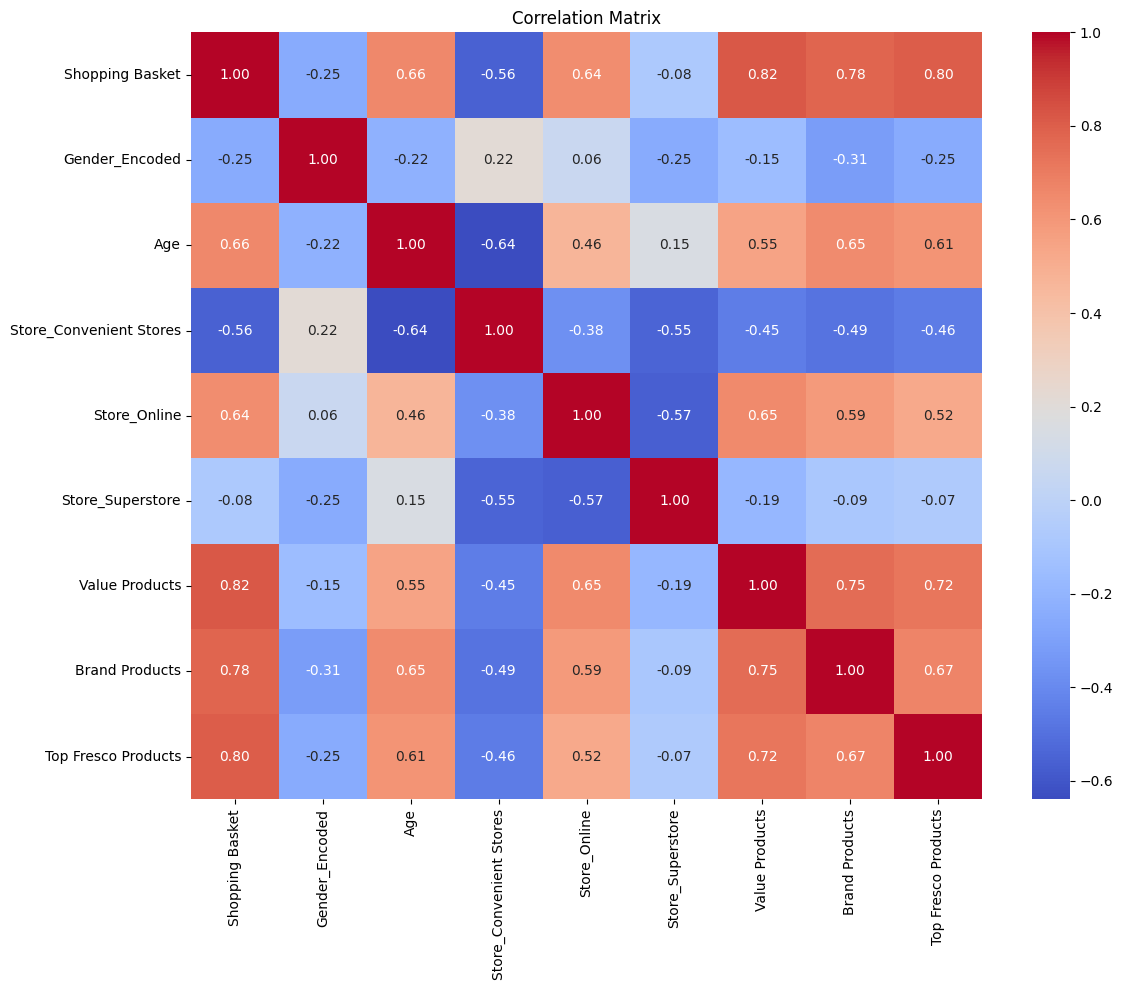

In [15]:
# Phân tích tương quan
plt.figure(figsize=(12, 10))
correlation_matrix = data[['Shopping Basket', 'Gender_Encoded', 'Age', 'Store_Convenient Stores', 
                          'Store_Online', 'Store_Superstore', 'Value Products', 
                          'Brand Products', 'Top Fresco Products']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### LinearRegression

In [19]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_val_scaled)

In [20]:
# Đánh giá mô hình
mse = mean_squared_error(y_val, y_pred_linear)
r2 = r2_score(y_val, y_pred_linear)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Hiển thị hệ số
feature_names = ['Gender_Encoded', 'Age', 'Store_Convenient Stores', 'Store_Online', 'Store_Superstore', 
                'Value Products', 'Brand Products', 'Top Fresco Products']
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': linear_model.coef_})
print("\nHệ số của mô hình hồi quy tuyến tính:")
print(coefficients.sort_values(by='Coefficient', ascending=False))
print(f"Intercept (Hệ số chặn): {linear_model.intercept_:.2f}")

Mean Squared Error: 307.26
R² Score: 0.84

Hệ số của mô hình hồi quy tuyến tính:
                   Feature  Coefficient
7      Top Fresco Products    12.911577
5           Value Products    11.935171
6           Brand Products     6.165072
3             Store_Online     4.347181
1                      Age     1.533430
4         Store_Superstore    -0.918356
0           Gender_Encoded    -1.491699
2  Store_Convenient Stores    -3.619124
Intercept (Hệ số chặn): 61.93


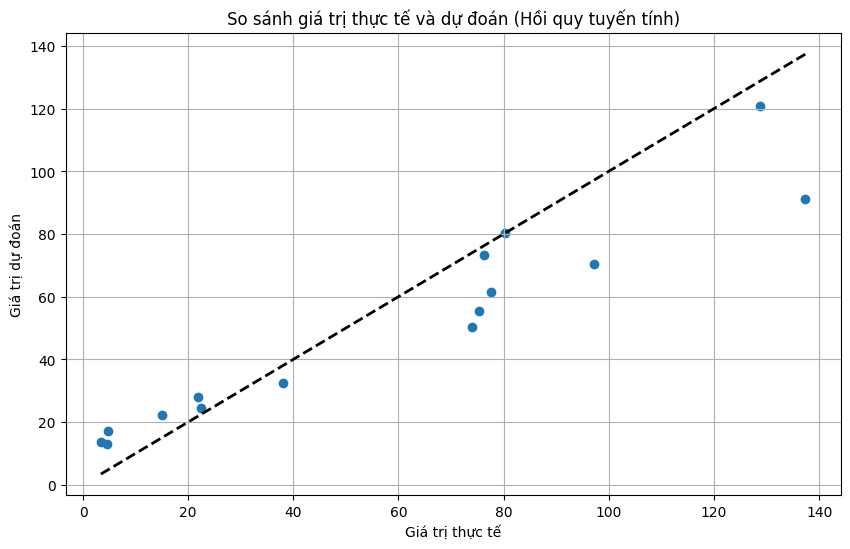

In [21]:
# Biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_linear)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị thực tế và dự đoán (Hồi quy tuyến tính)')
plt.grid(True)
plt.show()

In [22]:
# Tạo biến mục tiêu cho bài toán phân loại (Shopping Basket > 50 -> 1, còn lại -> -1)
y_class = (data['Shopping Basket'] > 50).astype(int) * 2 - 1
y_class_train, y_class_val = y_class.iloc[:60], y_class.iloc[60:]

In [23]:
# Biến mục tiêu cho mô hình logistic regression (yêu cầu 0 và 1)
y_class_log = (data['Shopping Basket'] > 50).astype(int)
y_class_log_train, y_class_log_val = y_class_log.iloc[:60], y_class_log.iloc[60:]

### PERCEPTRON

In [24]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train_scaled, y_class_train)

# Dự đoán trên tập validation
y_pred_perceptron = perceptron.predict(X_val_scaled)

In [25]:
# Đánh giá mô hình
accuracy_perceptron = accuracy_score(y_class_val, y_pred_perceptron)
print(f"Độ chính xác của mô hình Perceptron: {accuracy_perceptron:.2f}")

Độ chính xác của mô hình Perceptron: 0.93


In [26]:
# Hiển thị hệ số
coefficients_perceptron = pd.DataFrame({'Feature': feature_names, 'Coefficient': perceptron.coef_[0]})
print("\nHệ số của mô hình Perceptron:")
print(coefficients_perceptron.sort_values(by='Coefficient', ascending=False))
print(f"Intercept (Hệ số chặn): {perceptron.intercept_[0]:.2f}")


Hệ số của mô hình Perceptron:
                   Feature  Coefficient
6           Brand Products     4.937355
5           Value Products     4.503773
4         Store_Superstore     1.681682
3             Store_Online     0.895718
1                      Age     0.443905
0           Gender_Encoded    -1.000000
7      Top Fresco Products    -1.219918
2  Store_Convenient Stores    -2.886751
Intercept (Hệ số chặn): 5.00


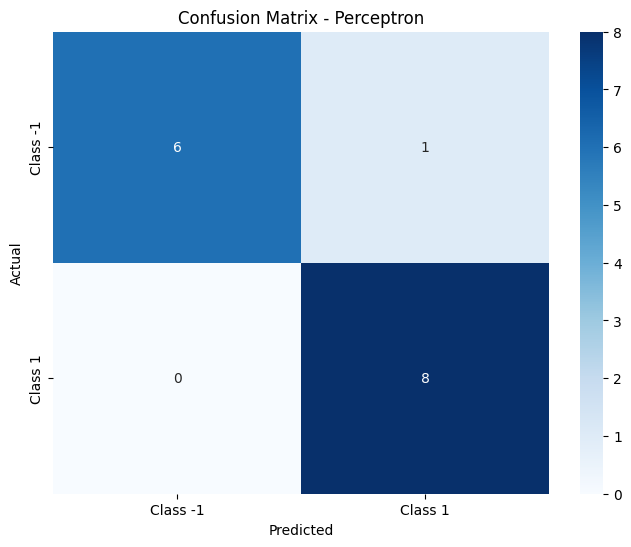


Báo cáo phân loại - Perceptron:
              precision    recall  f1-score   support

    Class -1       1.00      0.86      0.92         7
     Class 1       0.89      1.00      0.94         8

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [27]:
# Ma trận nhầm lẫn
cm_perceptron = confusion_matrix(y_class_val, y_pred_perceptron)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class -1', 'Class 1'], 
            yticklabels=['Class -1', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Perceptron')
plt.show()

print("\nBáo cáo phân loại - Perceptron:")
print(classification_report(y_class_val, y_pred_perceptron, target_names=['Class -1', 'Class 1']))

### HỒI QUY LOGISTIC

In [28]:
logistic = LogisticRegression(random_state=42, max_iter=1000)
logistic.fit(X_train_scaled, y_class_log_train)

# Dự đoán trên tập validation
y_pred_logistic = logistic.predict(X_val_scaled)

In [29]:
# Hiển thị hệ số
coefficients_logistic = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic.coef_[0]})
print("\nHệ số của mô hình Hồi quy Logistic:")
print(coefficients_logistic.sort_values(by='Coefficient', ascending=False))
print(f"Intercept (Hệ số chặn): {logistic.intercept_[0]:.2f}")


Hệ số của mô hình Hồi quy Logistic:
                   Feature  Coefficient
6           Brand Products     1.636150
5           Value Products     1.308237
3             Store_Online     0.721355
1                      Age     0.350973
0           Gender_Encoded     0.311262
7      Top Fresco Products     0.241439
4         Store_Superstore     0.003171
2  Store_Convenient Stores    -0.778565
Intercept (Hệ số chặn): 1.53


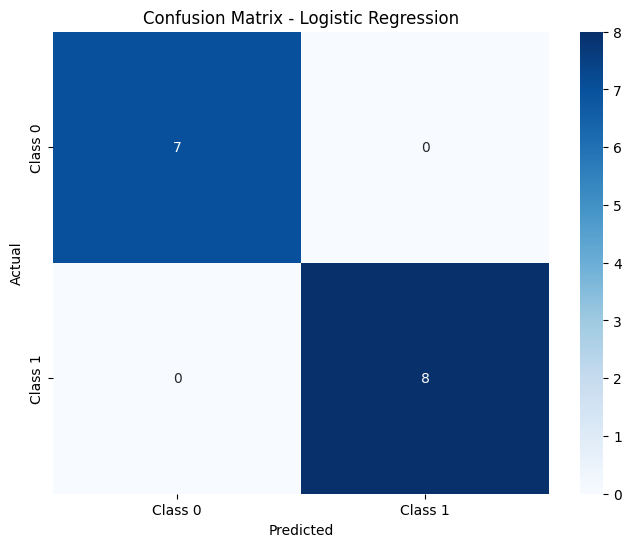

In [30]:
# Ma trận nhầm lẫn
cm_logistic = confusion_matrix(y_class_log_val, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [31]:
print("\nBáo cáo phân loại - Hồi quy Logistic:")
print(classification_report(y_class_log_val, y_pred_logistic, target_names=['Class 0', 'Class 1']))


Báo cáo phân loại - Hồi quy Logistic:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         7
     Class 1       1.00      1.00      1.00         8

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



### NAIVE BAYES

In [32]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_class_log_train)

# Dự đoán trên tập validation
y_pred_nb = naive_bayes.predict(X_val_scaled)

In [33]:
# Đánh giá mô hình
accuracy_nb = accuracy_score(y_class_log_val, y_pred_nb)
print(f"Độ chính xác của mô hình Naive Bayes: {accuracy_nb:.2f}")

Độ chính xác của mô hình Naive Bayes: 0.73


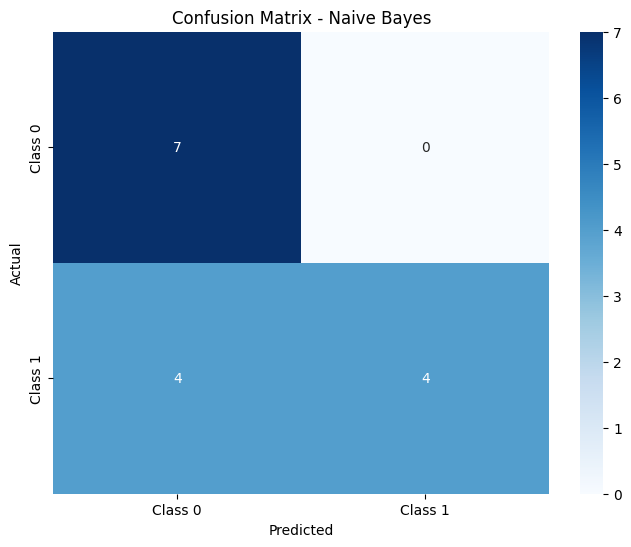

In [34]:
# Ma trận nhầm lẫn
cm_nb = confusion_matrix(y_class_log_val, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [35]:
print("\nBáo cáo phân loại - Naive Bayes:")
print(classification_report(y_class_log_val, y_pred_nb, target_names=['Class 0', 'Class 1']))


Báo cáo phân loại - Naive Bayes:
              precision    recall  f1-score   support

     Class 0       0.64      1.00      0.78         7
     Class 1       1.00      0.50      0.67         8

    accuracy                           0.73        15
   macro avg       0.82      0.75      0.72        15
weighted avg       0.83      0.73      0.72        15



### SO SÁNH CÁC MÔ HÌNH PHÂN LOẠI

In [38]:
accuracy_perceptron = accuracy_score(y_class_val, y_pred_perceptron)
accuracy_logistic = accuracy_score(y_class_log_val, y_pred_logistic)
accuracy_nb = accuracy_score(y_class_log_val, y_pred_nb)

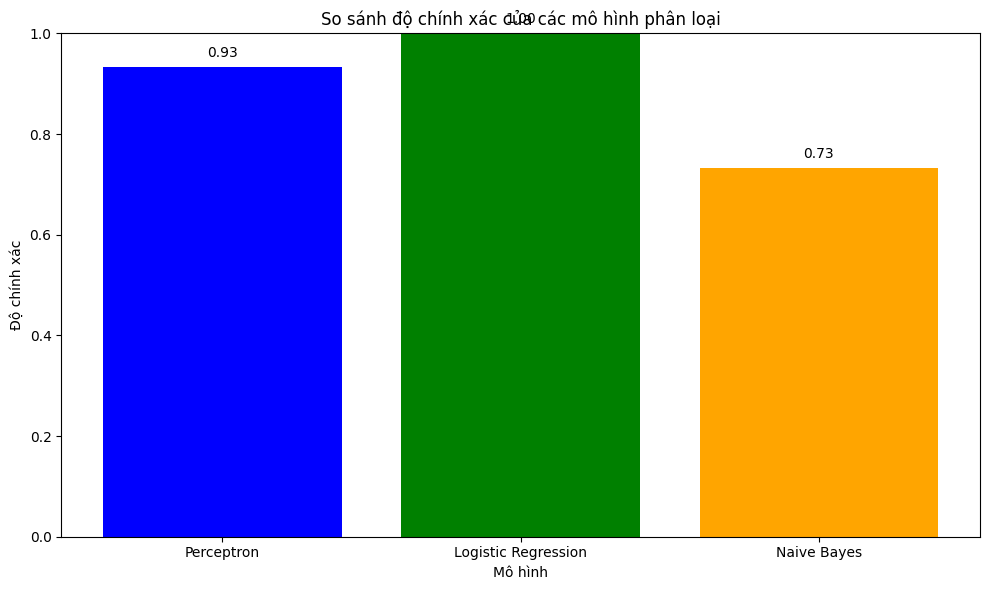

In [39]:
models = ['Perceptron', 'Logistic Regression', 'Naive Bayes']
accuracies = [accuracy_perceptron, accuracy_logistic, accuracy_nb]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.title('So sánh độ chính xác của các mô hình phân loại')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

1. Mô hình hồi quy tuyến tính:
   - Các hệ số cho thấy mức độ ảnh hưởng của từng biến đến giá trị giỏ hàng
   - Biến có hệ số dương làm tăng giá trị giỏ hàng, biến có hệ số âm làm giảm giá trị giỏ hàng
   - R² cho biết mức độ phù hợp của mô hình với dữ liệu

2. So sánh các mô hình phân loại:
   - Perceptron: Mô hình đơn giản, hiệu quả với dữ liệu tuyến tính phân tách
   - Hồi quy Logistic: Mô hình xác suất, cho kết quả tốt với nhiều loại dữ liệu
   - Naive Bayes: Mô hình xác suất dựa trên định lý Bayes, hiệu quả với dữ liệu có nhiều chiều

3. Kết luận:
   - Mô hình nào có độ chính xác cao nhất phụ thuộc vào đặc điểm của dữ liệu
   - Các yếu tố ảnh hưởng đến giá trị giỏ hàng và phân loại khách hàng có thể được xác định qua hệ số của các mô hình